In [1]:
import pandas as pd
y_pred_hozon = pd.read_csv('y_pred_hozon_weight_nashi.csv')
y_test_hozon = pd.read_csv('y_test_hozon_weight_nashi.csv')

predictions = y_pred_hozon["y_pred"].tolist()
y_test = y_test_hozon["y_test"].tolist()


predictions = [eval(s) for s in predictions]
y_test = [eval(s) for s in y_test]

In [2]:
Joy_pred = []
Sadness_pred = []
Anticipation_pred= []
Surprise_pred = []
Anger_pred = []
Fear_pred = []
Disgust_pred = []
Trust_pred = []
for i in range(len(predictions)):
    Joy_pred.append(predictions[i][0])
    Sadness_pred.append(predictions[i][1])
    Anticipation_pred.append(predictions[i][2])
    Surprise_pred.append(predictions[i][3])
    Anger_pred.append(predictions[i][4])
    Fear_pred.append(predictions[i][5])
    Disgust_pred.append(predictions[i][6])
    Trust_pred.append(predictions[i][7])
    
Joy_test = []
Sadness_test = []
Anticipation_test= []
Surprise_test = []
Anger_test = []
Fear_test = []
Disgust_test = []
Trust_test = []
for j in range(len(y_test)):
    Joy_test.append(int(y_test[j][0]))
    Sadness_test.append(int(y_test[j][1]))
    Anticipation_test.append(int(y_test[j][2]))
    Surprise_test.append(int(y_test[j][3]))
    Anger_test.append(int(y_test[j][4]))
    Fear_test.append(int(y_test[j][5]))
    Disgust_test.append(int(y_test[j][6]))
    Trust_test.append(int(y_test[j][7]))


In [3]:
import numpy as np
print(Joy_test.count(1))
print(Sadness_test.count(1))
print(Anticipation_test.count(1))
print(Surprise_test.count(1))
print(Anger_test.count(1))
print(Fear_test.count(1))
print(Disgust_test.count(1))
print(Trust_test.count(1))
print("0_test")
print(Joy_test.count(0))
print(Sadness_test.count(0))
print(Anticipation_test.count(0))
print(Surprise_test.count(0))
print(Anger_test.count(0))
print(Fear_test.count(0))
print(Disgust_test.count(0))
print(Trust_test.count(0))
print("0_pred")
print(Joy_pred.count(0))
print(Sadness_pred.count(0))
print(Anticipation_pred.count(0))
print(Surprise_pred.count(0))
print(Anger_pred.count(0))
print(Fear_pred.count(0))
print(Disgust_pred.count(0))
print(Trust_pred.count(0))
print("予測")
print(Joy_pred.count(1))
print(Sadness_pred.count(1))
print(Anticipation_pred.count(1))
print(Surprise_pred.count(1))
print(Anger_pred.count(1))
print(Fear_pred.count(1))
print(Disgust_pred.count(1))
print(Trust_pred.count(1))

744
620
736
380
297
313
387
288
0_test
1256
1380
1264
1620
1703
1687
1613
1712
0_pred
1397
1522
1543
1897
1996
1982
1963
1962
予測
603
478
457
103
4
18
37
38


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

def compute_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = 2 * precision * recall / (precision + recall)
    #f1 = f1_score(y_test, y_pred, average = "micro")
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [5]:
Joy = compute_metrics(Joy_test,Joy_pred)
Sadness = compute_metrics(Sadness_test,Sadness_pred)
Anticipation = compute_metrics(Anticipation_test,Anticipation_pred)
Surprise = compute_metrics(Surprise_test,Surprise_pred)
Anger = compute_metrics(Anger_test,Anger_pred)
Fear = compute_metrics(Fear_test,Fear_pred)
Disgust = compute_metrics(Disgust_test,Disgust_pred)
Trust = compute_metrics(Trust_test,Trust_pred)
print(Joy)
print(Sadness)
print(Anticipation)
print(Surprise)
print(Anger)
print(Fear)
print(Disgust)
print(Trust)

{'accuracy': 0.7365, 'f1': 0.6087602078693393, 'precision': 0.6799336650082919, 'recall': 0.5510752688172043}
{'accuracy': 0.717, 'f1': 0.4845173041894353, 'precision': 0.5564853556485355, 'recall': 0.4290322580645161}
{'accuracy': 0.6885, 'f1': 0.47778709136630343, 'precision': 0.6236323851203501, 'recall': 0.38722826086956524}
{'accuracy': 0.8235, 'f1': 0.26915113871635615, 'precision': 0.6310679611650486, 'recall': 0.17105263157894737}
{'accuracy': 0.8525, 'f1': 0.01993355481727575, 'precision': 0.75, 'recall': 0.010101010101010102}
{'accuracy': 0.8485, 'f1': 0.08459214501510573, 'precision': 0.7777777777777778, 'recall': 0.04472843450479233}
{'accuracy': 0.813, 'f1': 0.1179245283018868, 'precision': 0.6756756756756757, 'recall': 0.06459948320413436}
{'accuracy': 0.854, 'f1': 0.10429447852760737, 'precision': 0.4473684210526316, 'recall': 0.059027777777777776}


<Figure size 640x480 with 0 Axes>

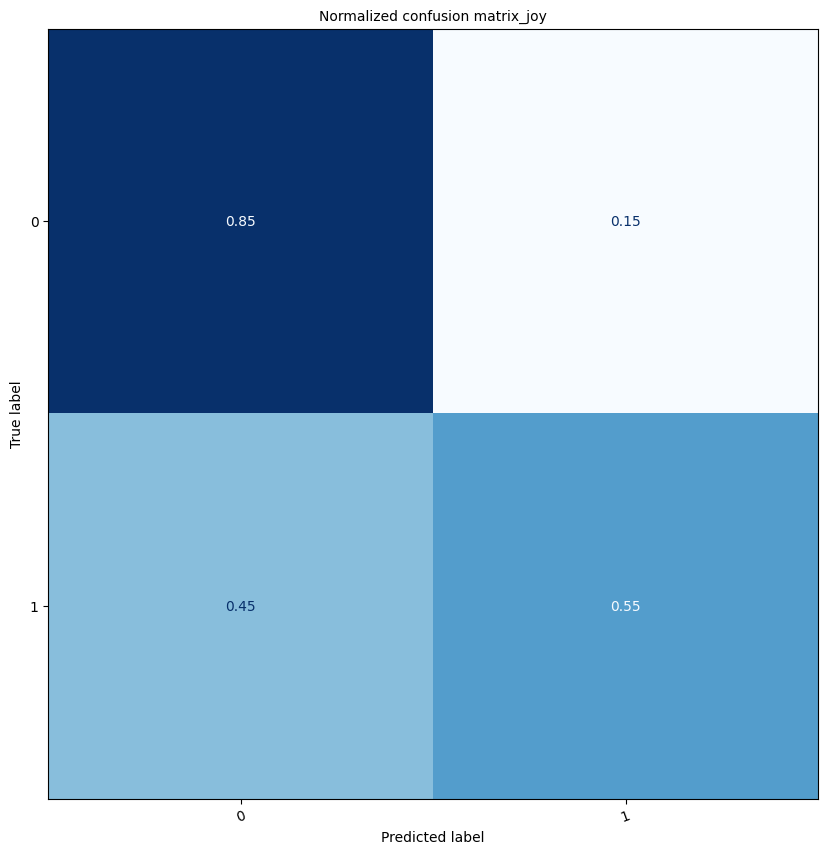

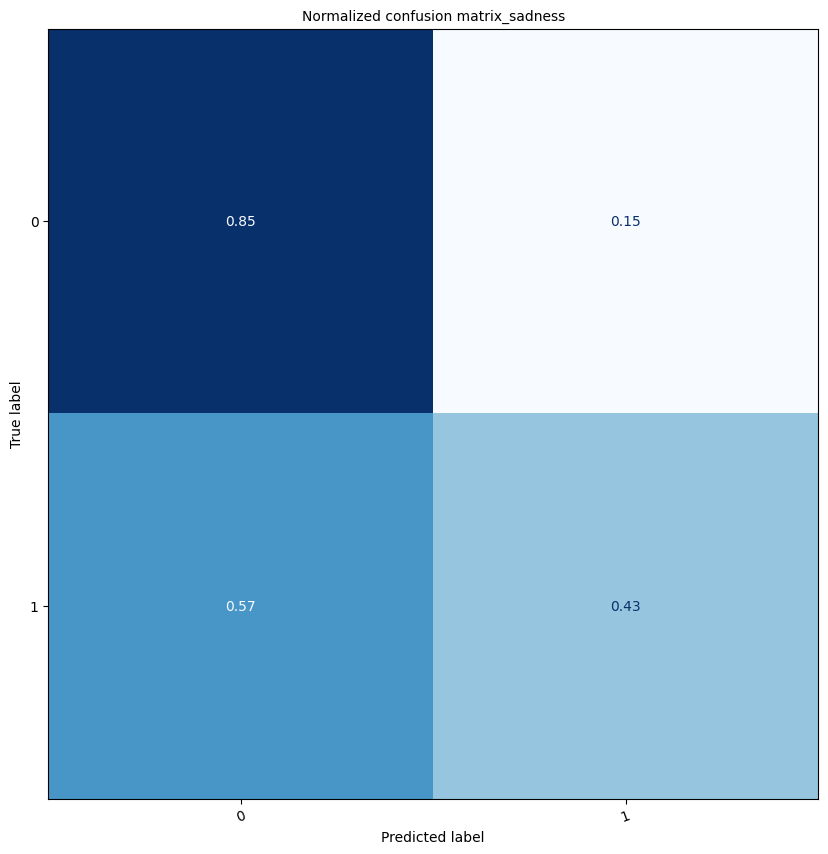

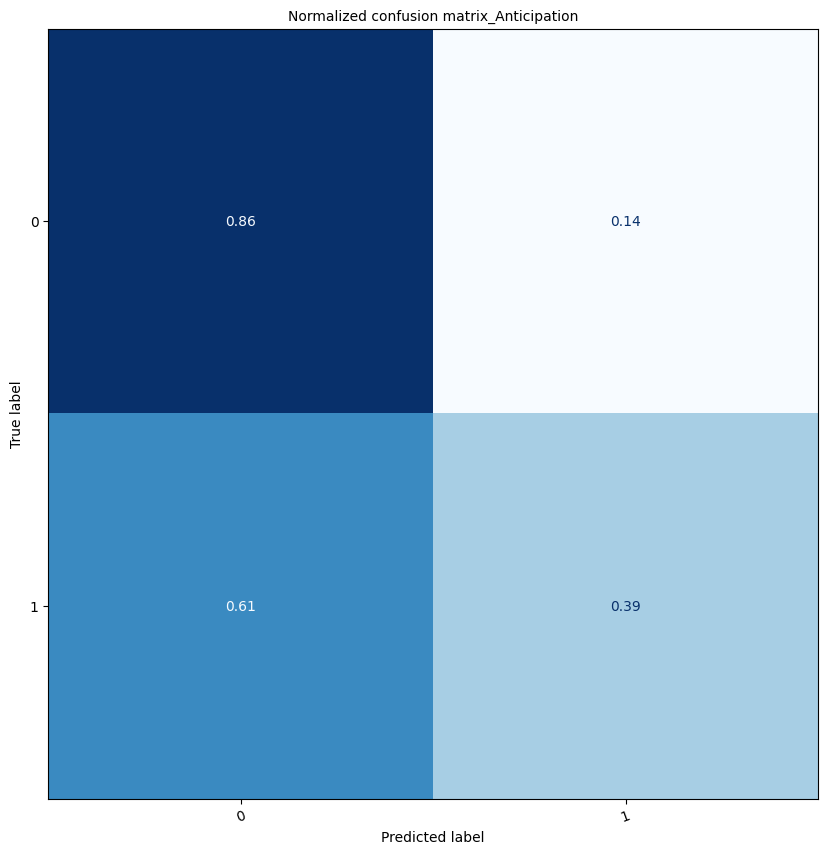

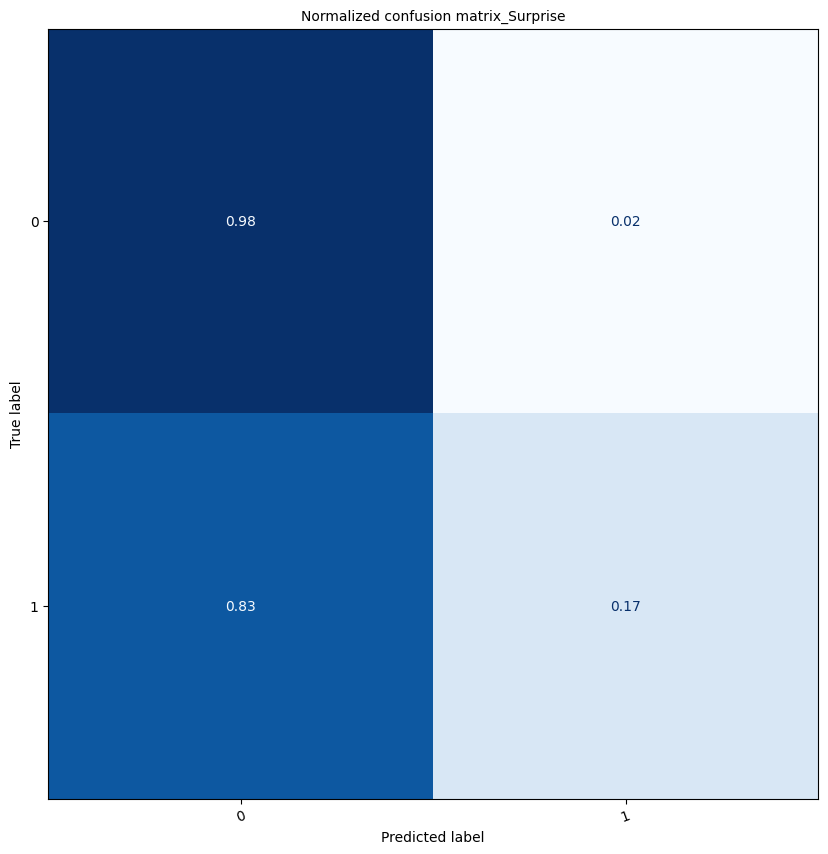

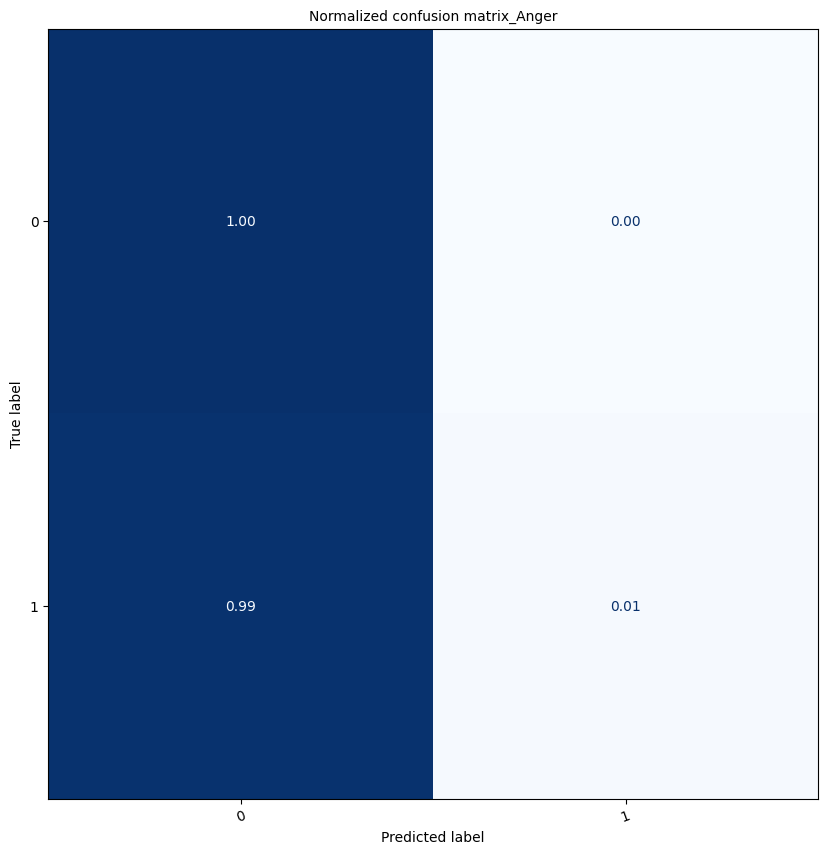

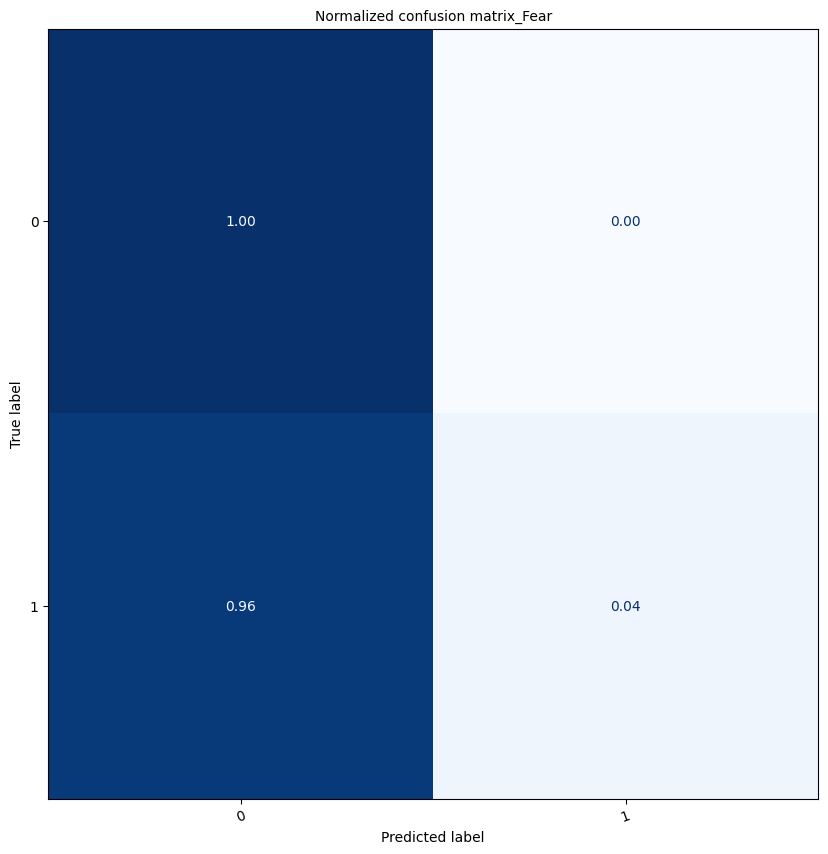

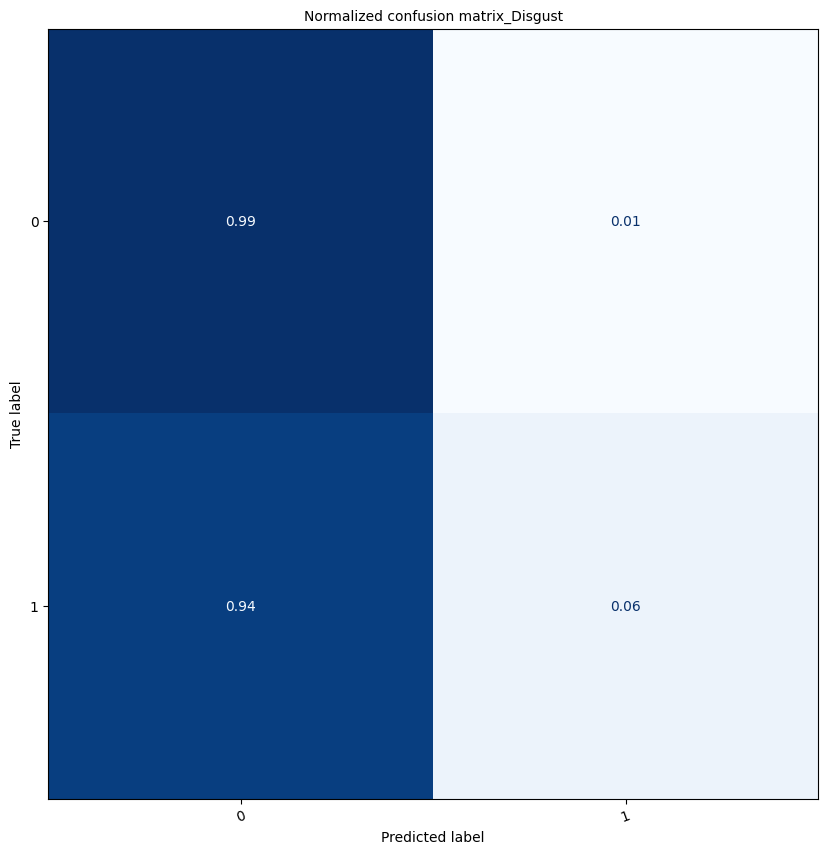

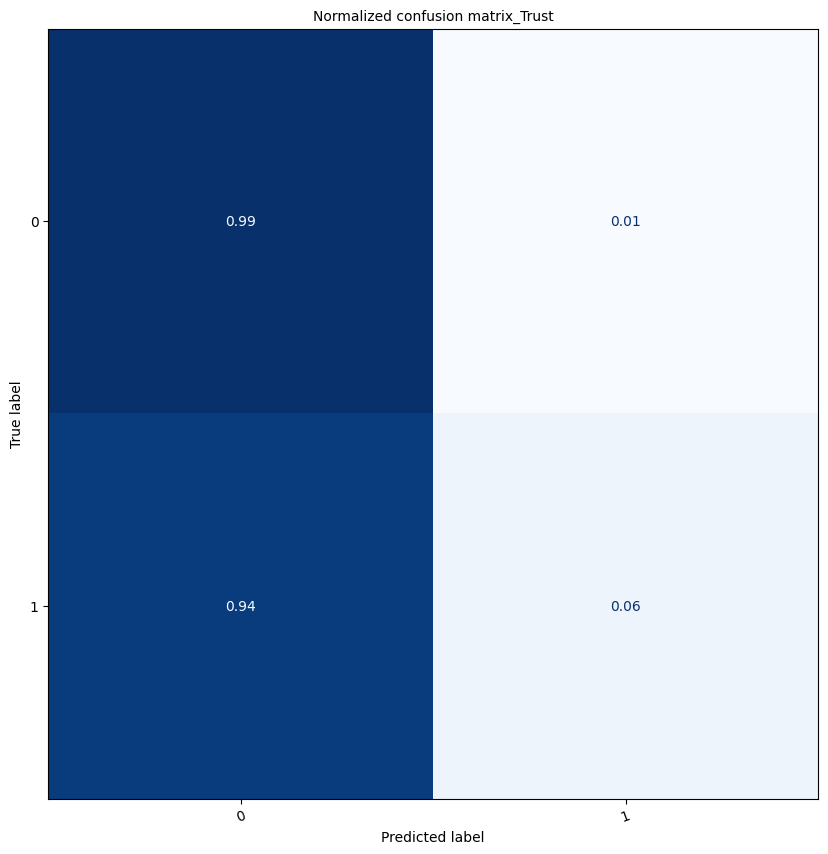

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig=plt.figure()


def plot_confusion_matrix(y_true, y_preds, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(10, 10))
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

    plt.yticks(fontsize=10)
    
    plt.xticks(rotation=20, fontsize = 10)
    plt.title("Normalized confusion matrix_" + labels, fontsize = 10)
    plt.show()
    fig.savefig(labels +"Normalized confusion matrix.png")

#plot_confusion_matrix(y_preds, y_test, labels)
plot_confusion_matrix(Joy_test,Joy_pred,"joy")
plot_confusion_matrix(Sadness_test, Sadness_pred,"sadness")
plot_confusion_matrix(Anticipation_test,Anticipation_pred,"Anticipation")
plot_confusion_matrix(Surprise_test,Surprise_pred,"Surprise")
plot_confusion_matrix(Anger_test,Anger_pred,"Anger")
plot_confusion_matrix(Fear_test,Fear_pred,"Fear")
plot_confusion_matrix(Disgust_test,Disgust_pred,"Disgust")
plot_confusion_matrix(Trust_test,Trust_pred,"Trust")